# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

# Input-Output Operations

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'   #导入绘图程序库和定制设置

## Basic I/O with Python

### Writing Objects to Disk

In [2]:
path = './'  # 选择文件路径

In [3]:
import numpy as np
from random import gauss

In [4]:
a = [gauss(1.5, 2) for i in range(1000)]    # 生成正态分布随机数

In [5]:
import pickle

In [6]:
pkl_file = open(path + 'data.pkl', 'wb')   #打开可写文件

In [7]:
%time pickle.dump(a, pkl_file)

Wall time: 1 ms


In [8]:
pkl_file = open(path + 'data.pkl', 'rb')  # 打开只读文件

In [9]:
%time b = pickle.load(pkl_file)

Wall time: 0 ns


In [10]:
b[:5]

[-0.7686778481528997,
 2.228363387821805,
 2.6253667357856214,
 0.4393923464749705,
 2.9342522314556527]

In [11]:
a[:5]

[-0.7686778481528997,
 2.228363387821805,
 2.6253667357856214,
 0.4393923464749705,
 2.9342522314556527]

In [12]:
pkl_file.close()

### Reading and Writing Text Files

In [13]:
import pandas as pd

In [14]:
csv_file = open(path + 'data.csv', 'w')  # 打开可写文件

In [15]:
rows = 500 #定义数据集行数
a = np.random.standard_normal((rows, 5)).round(4)  # 创建一个5000行、每行有5个数的正态分布数据，小数后取4位
t = pd.date_range(start='2014/1/1', periods=rows, freq='H') #创建一个间隔为1小时的时间索引对象

In [16]:
header = 'date,no1,no2,no3,no4,no5\n'  #定义标题行（列标签）
csv_file.write(header)

25

In [17]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):      #按行合并数据
    s = '%s,%f,%f,%f,%f,%f\n' % (t_, no1, no2, no3, no4, no5)
    csv_file.write(s)
csv_file.close()

In [18]:
csv_file = open(path + 'data.csv', 'r')  # 打开只读文件

In [19]:
for i in range(5):
    print(csv_file.readline(), end='')

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,-0.652000,-0.694500,-0.626700,1.491300,-2.144200
2014-01-01 01:00:00,-0.683100,0.657000,-1.499900,0.405200,0.129300
2014-01-01 02:00:00,1.273200,-0.164800,0.817600,-1.652500,-1.089500
2014-01-01 03:00:00,1.661900,-0.302300,0.127100,1.399600,-0.258900


In [20]:
csv_file.close()

### SQL Databases

In [21]:
import sqlite3 as sq3

In [22]:
con = sq3.connect(path + 'numbs.db')

In [23]:
query = 'DROP TABLE IF EXISTS numbs'

In [24]:
con.execute(query)

In [25]:
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'   #创建一个三列的列表

In [26]:
con.execute(query)

In [27]:
con.commit()

In [28]:
import datetime as dt

In [29]:
con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
            (dt.datetime.now(), 0.12, 7.3))

In [30]:
data = np.random.standard_normal((1000, 2)).round(4)

In [31]:
for row in data:
    con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
                (dt.datetime.now(), row[0], row[1]))
con.commit()

In [32]:
con.execute('SELECT * FROM numbs').fetchmany(5)

[('2020-11-06 11:49:30.677937', 0.12, 7.3),
 ('2020-11-06 11:49:31.463896', 0.3892, 0.1035),
 ('2020-11-06 11:49:31.463896', 1.0619, 0.6587),
 ('2020-11-06 11:49:31.463896', 0.3328, 1.0234),
 ('2020-11-06 11:49:31.463896', -1.2344, 1.5317)]

In [33]:
con.close()

### Writing and Reading Numpy Arrays

In [34]:
import numpy as np

In [61]:
data = np.random.standard_normal((1000, 6)).round(4)

In [62]:
%time np.save(path + 'array', data)

Wall time: 2 ms


In [63]:
%time np.load(path + 'array.npy')

Wall time: 11 ms


array([[ 0.111 , -0.2511,  1.8935,  0.6422, -1.6485,  2.2287],
       [ 0.9238,  0.7384,  1.667 ,  0.7103,  2.0673,  1.0395],
       [ 1.921 , -0.9053,  0.5849,  0.1739,  0.3538, -0.2987],
       ...,
       [-1.3332, -0.9881, -0.5392,  1.7172,  3.6602,  1.0478],
       [ 0.7345, -0.2955,  0.1899,  0.2393,  0.2876, -0.1487],
       [-0.7502,  0.3327, -1.1182, -0.2984, -0.4258,  0.5626]])

In [38]:
data = 0.0

## I/O with pandas

In [39]:
import numpy as np
import pandas as pd
data = np.random.standard_normal((10000, 5)).round(4)
        # sample data set

In [40]:
filename = path + 'numbs'

### SQL Database

In [41]:
import sqlite3 as sq3

In [42]:
con = sq3.Connection(filename + '.db')

In [43]:
query = 'DROP TABLE IF EXISTS numbers'

In [44]:
con.execute(query)

In [45]:
query = 'CREATE TABLE numbers (No1 real, No2 real,\
        No3 real, No4 real, No5 real)'

In [46]:
con.execute(query)

In [47]:
%%time
con.executemany('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)
con.commit()

Wall time: 858 ms


In [48]:
%%time
temp = con.execute('SELECT * FROM numbers').fetchall()
print(temp[:2])
temp = 0.0

[(-0.4054, -1.7665, 0.0206, 0.6488, 1.1535), (0.1847, -1.9551, 1.0735, -0.7691, 0.3617)]
Wall time: 35 ms


In [49]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(con.execute(query).fetchall()).round(4)

Wall time: 12 ms


(-4.5, 0.5)

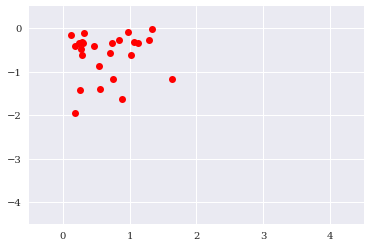

In [50]:
res = res[::100]  # every 100th result
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(res[:, 0], res[:, 1], 'ro')
plt.grid(True); plt.xlim(-0.5, 4.5); plt.ylim(-4.5, 0.5)
# tag: scatter_query
# title: Plot of the query result
# size: 60

### From SQL to pandas

In [51]:
%time data = pd.read_sql('SELECT * FROM numbers', con)

Wall time: 316 ms


In [52]:
data.head()

,No1,No2,No3,No4,No5
0,-0.4054,-1.7665,0.0206,0.6488,1.1535
1,0.1847,-1.9551,1.0735,-0.7691,0.3617
2,-0.4032,-0.4838,-0.4607,1.2811,0.9758
3,1.7599,-0.3888,-1.1012,-0.0159,0.4665
4,0.4018,-0.1219,0.7040,-1.3311,-0.0853


In [53]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()

Wall time: 2 ms


,No1,No2,No3,No4,No5
1,0.1847,-1.9551,1.0735,-0.7691,0.3617
3,1.7599,-0.3888,-1.1012,-0.0159,0.4665
4,0.4018,-0.1219,0.7040,-1.3311,-0.0853
11,1.2108,-1.0517,-0.6299,0.5123,-0.4174
15,0.6259,-0.0813,0.4126,0.5831,0.0193


In [54]:
%%time
res = data[['No1', 'No2']][((data['No1'] > 0.5) | (data['No1'] < -0.5))& ((data['No2'] < -1) | (data['No2'] > 1))]

Wall time: 3 ms


(-4.162025, 3.5715250000000003, -4.064665, 4.0327649999999995)

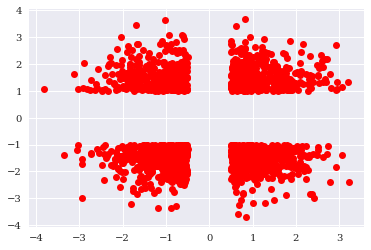

In [55]:
plt.plot(res.No1, res.No2, 'ro')
plt.grid(True); plt.axis('tight')
# tag: data_scatter_1
# title: Scatter plot of complex query results
# size: 55

### Data as CSV File

In [56]:
%time data.to_csv(filename + '.csv')

Wall time: 166 ms


Wall time: 146 ms


c:\users\why\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\why\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\why\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum +

array([[<AxesSubplot:title={'center':'No1'}>,
        <AxesSubplot:title={'center':'No2'}>],
       [<AxesSubplot:title={'center':'No3'}>,
        <AxesSubplot:title={'center':'No4'}>]], dtype=object)

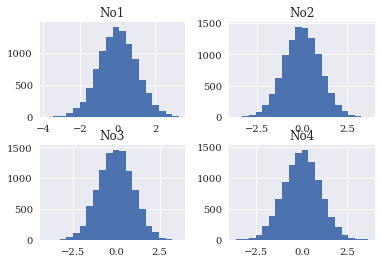

In [57]:
%%time
pd.read_csv(filename + '.csv')[['No1', 'No2',
                                'No3', 'No4']].hist(bins=20);
# tag: data_hist_3
# title: Histogram of 4 data set

### Data as Excel File

In [58]:
%time data[:10000].to_excel(filename + '.xlsx')

Wall time: 3.13 s


Wall time: 1.12 s


<AxesSubplot:>

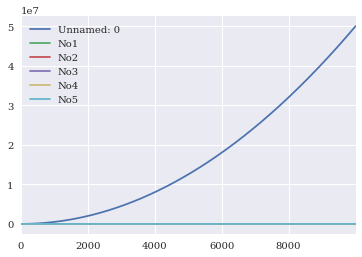

In [59]:
%time pd.read_excel(filename + '.xlsx', 'Sheet1').cumsum().plot()
# tag: data_paths
# title: Paths of random data from Excel file
# size: 60